In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import easygui as ey
import glob2 as glob
import statsmodels.api as sm
import scipy.stats as stats
import plotly.express as px

In [2]:
glob.glob('*.*')

['data.csv', 'Linear Regression - 2.ipynb', 'Linear Regression.ipynb']

In [3]:
path = ey.fileopenbox()

In [4]:
path

'C:\\Users\\Asus\\Desktop\\Imarticus\\Regression\\Linear Regression\\data.csv'

In [5]:
data = pd.read_csv(path)

In [6]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
data.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [9]:
data.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [10]:
data.columns = [i.lower() for i in data.columns]

In [11]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [35]:
def unique(x):
    count = 0
    for i in x.unique():
        count+=1
    print(f'Count of unique values in {x.name} : {count}')
    print(x.unique())

In [36]:
unique(data['origin'])

Count of unique values in origin : 3
[1 3 2]


In [37]:
unique(data['cylinders'])

Count of unique values in cylinders : 5
[8 4 6 3 5]


In [39]:
unique(data['horsepower'])

Count of unique values in horsepower : 94
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [40]:
unique(data['year'])

Count of unique values in year : 13
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982]


In [41]:
unique(data['name'])

Count of unique values in name : 305
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket

In [42]:
# Missing value check
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
kilometer_per_liter    0
dtype: int64

In [44]:
data_cont = data.drop(columns = ['origin','cylinders','horsepower','year','name'])
data_cat = data.drop(columns = ['displacement','weight','acceleration','kilometer_per_liter'])

In [45]:
data_cont

,displacement,weight,acceleration,kilometer_per_liter
0,307.0,3504,12.0,7.652587
1,350.0,3693,11.5,6.377156
2,318.0,3436,11.0,7.652587
3,304.0,3433,12.0,6.802299
4,302.0,3449,10.5,7.227443
...,...,...,...,...
393,140.0,2790,15.6,11.478880
394,97.0,2130,24.6,18.706323
395,135.0,2295,11.6,13.604599
396,120.0,2625,18.6,11.904024


In [46]:
data_cat

,origin,cylinders,horsepower,year,name
0,1,8,130,1970,chevrolet chevelle malibu
1,1,8,165,1970,buick skylark 320
2,1,8,150,1970,plymouth satellite
3,1,8,150,1970,amc rebel sst
4,1,8,140,1970,ford torino
...,...,...,...,...,...
393,1,4,86,1982,ford mustang gl
394,2,4,52,1982,vw pickup
395,1,4,84,1982,dodge rampage
396,1,4,79,1982,ford ranger


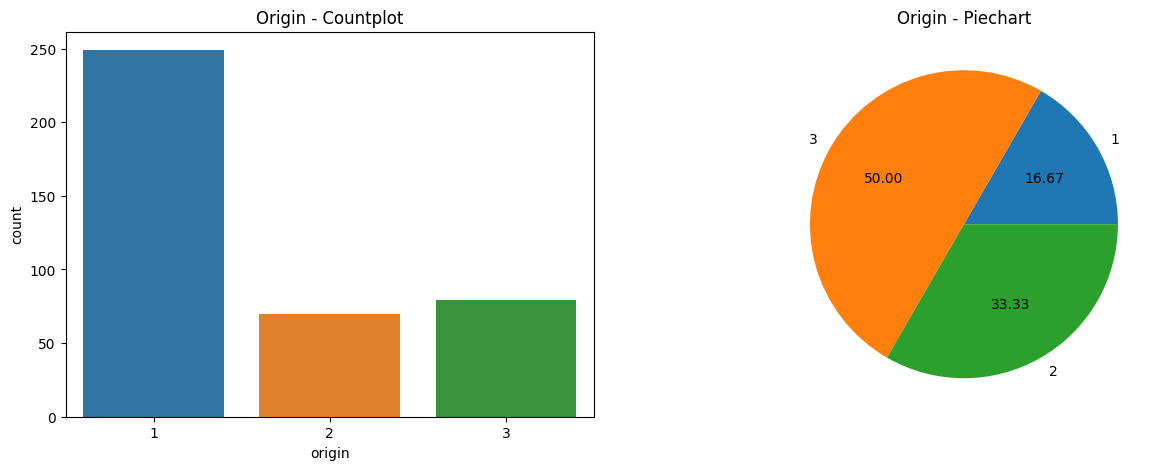

In [64]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,5])
sns.countplot(data = data,x = 'origin', ax = ax1)
ax2.pie(x = data['origin'].unique(), labels = data['origin'].unique(),autopct = '%.2f')
ax1.set(title = 'Origin - Countplot')
ax2.set(title = 'Origin - Piechart')
plt.show()

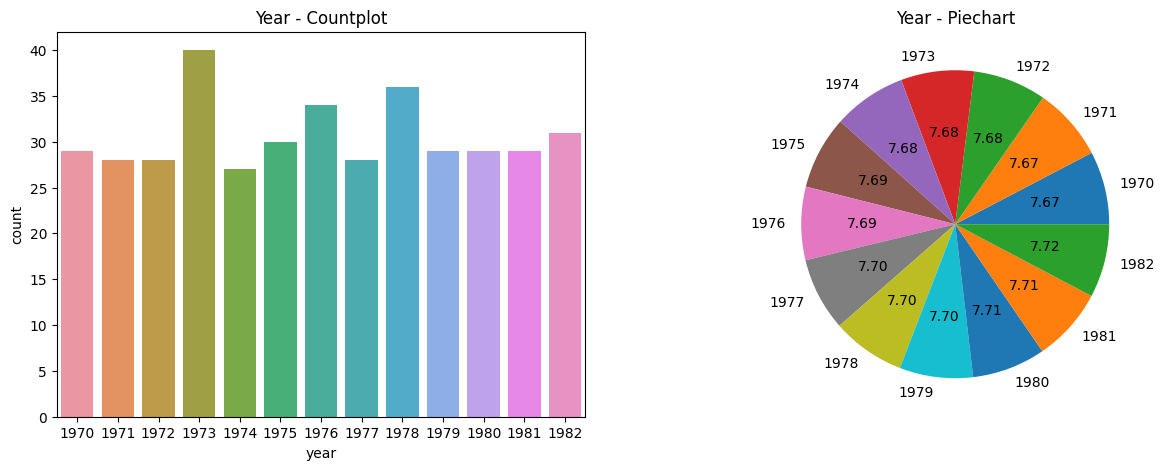

In [70]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,5])
sns.countplot(data = data, x = 'year',ax = ax1)
ax2.pie(x = data['year'].unique(),labels = data['year'].unique(), autopct = '%.2f')
ax1.set_title('Year - Countplot')
ax2.set_title('Year - Piechart')
plt.show()

In [71]:
data_cont

,displacement,weight,acceleration,kilometer_per_liter
0,307.0,3504,12.0,7.652587
1,350.0,3693,11.5,6.377156
2,318.0,3436,11.0,7.652587
3,304.0,3433,12.0,6.802299
4,302.0,3449,10.5,7.227443
...,...,...,...,...
393,140.0,2790,15.6,11.478880
394,97.0,2130,24.6,18.706323
395,135.0,2295,11.6,13.604599
396,120.0,2625,18.6,11.904024


In [104]:
def univariate(df,col):
    fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = [15,5])
    b = sns.histplot(data = df, x = col,ax = ax1,kde = True)
    ax1.set_title(f'{df[col].name} - Distribution Plot')
    sns.violinplot(data = df, x = col, ax = ax2)
    ax2.set_title(f'{df[col].name} - Violin Plot')
    sns.boxplot(data = df, x = col, ax = ax3)
    ax3.set_title(f'{df[col].name} - Box Plot')
    plt.show()

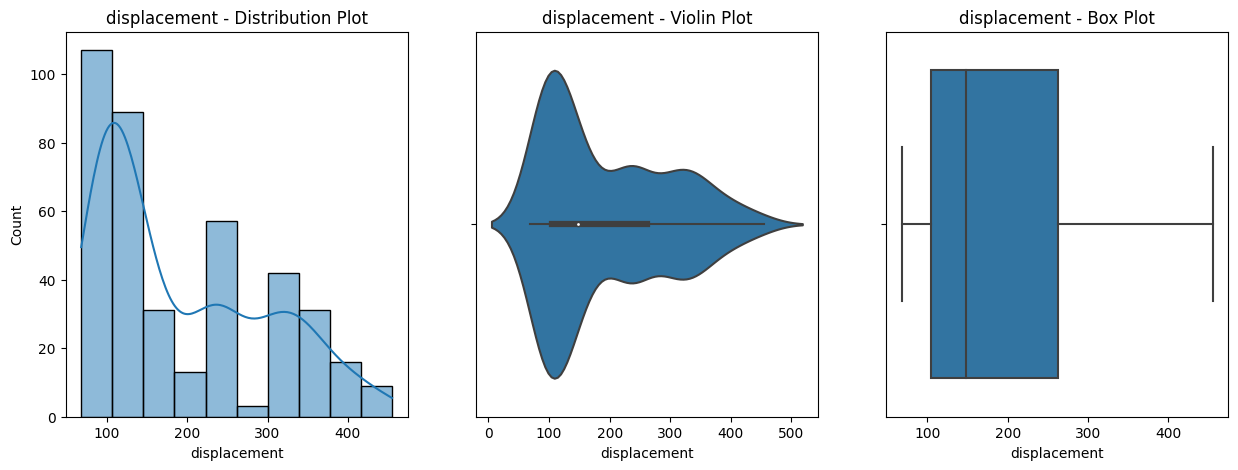

In [105]:
univariate(df = data,col = 'displacement')

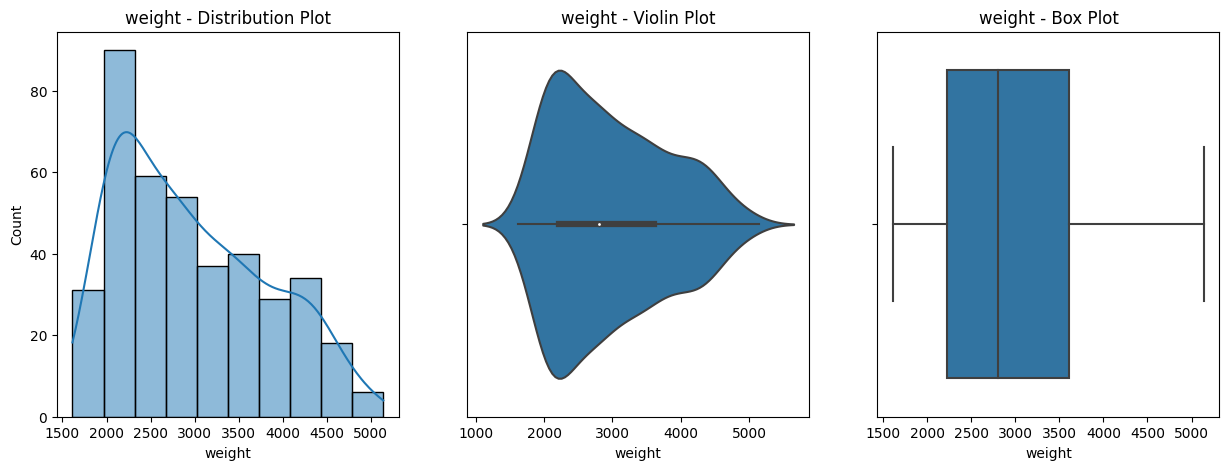

In [106]:
univariate(df = data,col = 'weight')

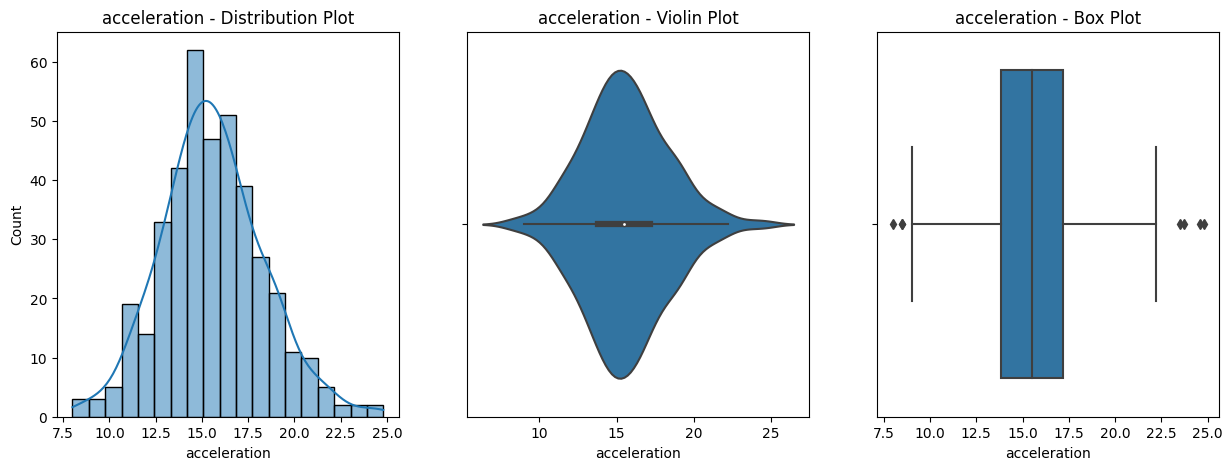

In [107]:
univariate(df = data,col = 'acceleration')

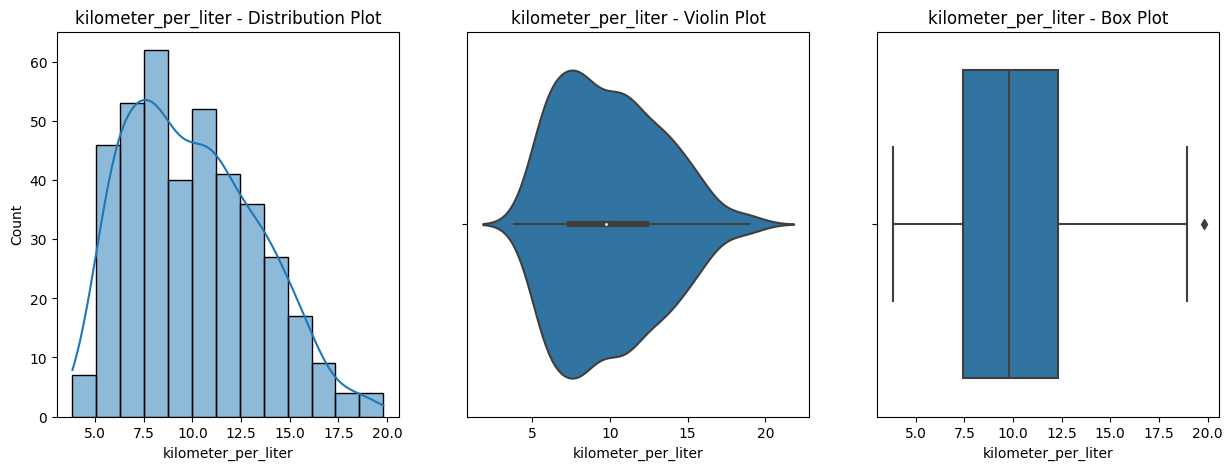

In [108]:
univariate(df = data,col = 'kilometer_per_liter')

In [114]:
def outlier_check(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    inner = q1 - 1.5*iqr
    outer = q3 + 1.5*iqr
    pos = []
    val = []
    count = 0
    for i,j in enumerate(x):
        if inner<j<outer:
            pass
        else:
            pos.append(i)
            val.append(j)
            count += 1
    print(x.name)
    print(f'No of outliers in {x.name} : {count}')
    print(f'Inner_fence : {inner} , Outer_fence : {outer}')
    for i,j in zip(pos,val):
        print(f'{i} --- {j}')

In [115]:
for i in data_cont.columns:
    outlier_check(data_cont[i])
    print('\n')

displacement
No of outliers in displacement : 0
Inner_fence : -132.375 , Outer_fence : 498.625


weight
No of outliers in weight : 0
Inner_fence : 147.375 , Outer_fence : 5684.375


acceleration
No of outliers in acceleration : 9
Inner_fence : 8.8 , Outer_fence : 22.2
7 --- 8.5
9 --- 8.5
11 --- 8.0
59 --- 23.5
195 --- 22.2
299 --- 24.8
300 --- 22.2
326 --- 23.7
394 --- 24.6


kilometer_per_liter
No of outliers in kilometer_per_liter : 1
Inner_fence : 0.10628592685756999 , Outer_fence : 19.66289646865008
322 --- 19.81169676625068




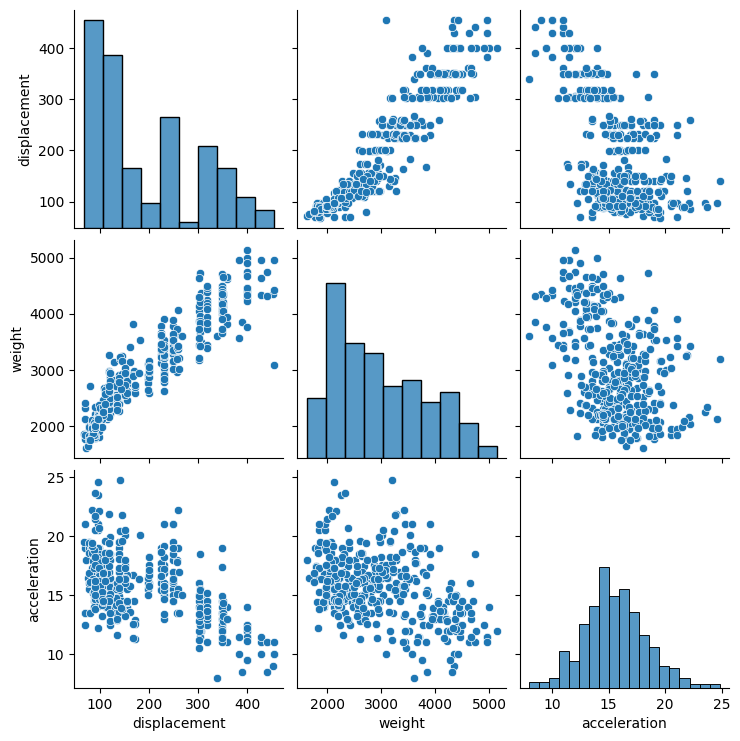

In [119]:
sns.pairplot(data = data_cont.drop(columns = 'kilometer_per_liter'))

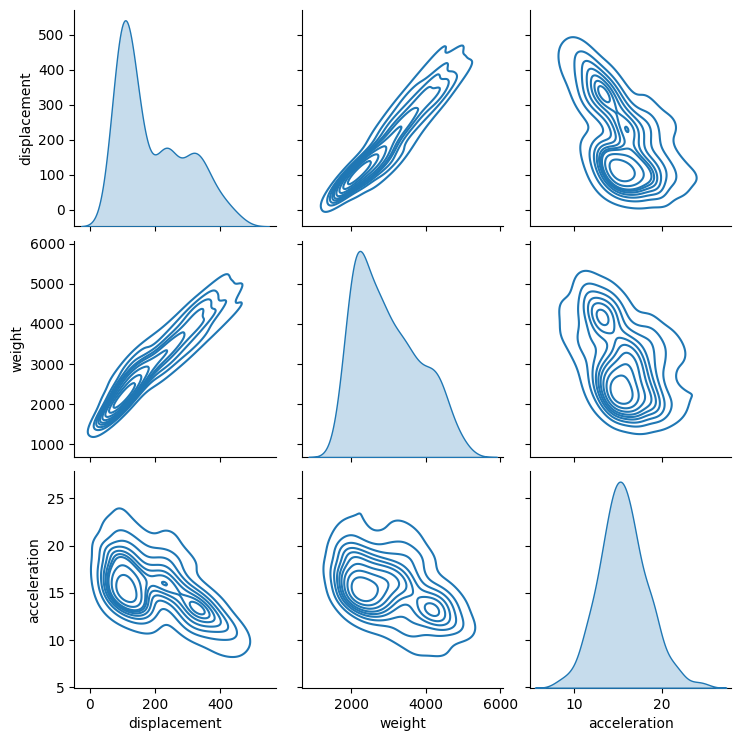

In [120]:
sns.pairplot(data = data_cont.drop(columns = 'kilometer_per_liter'),kind = 'kde')

<AxesSubplot: >

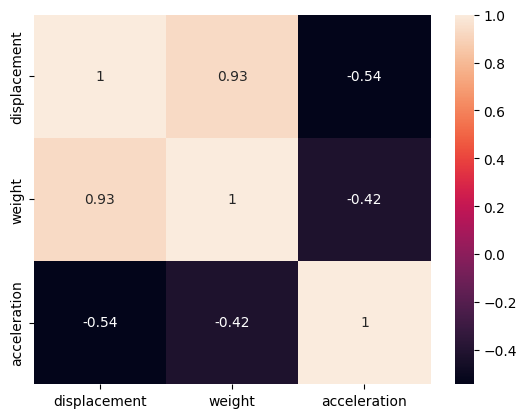

In [121]:
sns.heatmap(data = data_cont.drop(columns = 'kilometer_per_liter').corr(),annot = True)

In [138]:
# Missing value Treatment
for i in data['acceleration']:
    if 8.8 <= i <= 22.2:
        pass
    else:
        data.drop(index = data['acceleration'][data['acceleration'] == i].index,inplace = True)

In [140]:
data.reset_index(drop = True, inplace = True)

In [141]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
386,1,4,151.0,90,2950,17.3,1982,chevrolet camaro,11.478880
387,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
388,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
389,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [142]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
kilometer_per_liter    0
dtype: int64

In [143]:
data_cont = data.drop(columns = ['origin','cylinders','horsepower','year','name'])
data_cat = data.drop(columns = ['displacement','weight','acceleration','kilometer_per_liter'])

In [144]:
data_cont

,displacement,weight,acceleration,kilometer_per_liter
0,307.0,3504,12.0,7.652587
1,350.0,3693,11.5,6.377156
2,318.0,3436,11.0,7.652587
3,304.0,3433,12.0,6.802299
4,302.0,3449,10.5,7.227443
...,...,...,...,...
386,151.0,2950,17.3,11.478880
387,140.0,2790,15.6,11.478880
388,135.0,2295,11.6,13.604599
389,120.0,2625,18.6,11.904024


In [152]:
x = data_cont.iloc[:,:3]
y = data_cont.iloc[:,-1]

In [153]:
x

,displacement,weight,acceleration
0,307.0,3504,12.0
1,350.0,3693,11.5
2,318.0,3436,11.0
3,304.0,3433,12.0
4,302.0,3449,10.5
...,...,...,...
386,151.0,2950,17.3
387,140.0,2790,15.6
388,135.0,2295,11.6
389,120.0,2625,18.6


In [154]:
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
386    11.478880
387    11.478880
388    13.604599
389    11.904024
390    13.179455
Name: kilometer_per_liter, Length: 391, dtype: float64

In [161]:
def linearity_check(x,y):
    r_data = pd.DataFrame(columns = ['F1','F2','r','p-value','Significant'])
    for f1 in x.columns:
        r,p = stats.pearsonr(x[f1],y)
        if p<0.05:
            r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
        else:
            r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'No'},ignore_index = True)
    return r_data

In [162]:
linearity_check(x,y)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\542364465.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\542364465.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\542364465.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r_data = r_data.append({'F1':f1,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)


,F1,F2,r,p-value,Significant
0,displacement,kilometer_per_liter,-0.806933,5.553554e-91,Yes
1,weight,kilometer_per_liter,-0.836424,1.244205e-103,Yes
2,acceleration,kilometer_per_liter,0.391665,8.732041e-16,Yes


In [173]:
def normality_check(x):
    s_data = pd.DataFrame(columns = ['Feature','s','p-value','Normal'])
    for feature in x.columns:
        s,p = stats.shapiro(x[feature])
        if p>0.05:
            s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'Yes'},ignore_index = True)
        else:
            s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
        fig , (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = [8,4],)
        sns.kdeplot(x = x[feature],ax = ax1)
        sm.qqplot(data = x[feature],ax = ax2)
        fig.tight_layout(pad = 5)
    return s_data

C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\1620504754.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\1620504754.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'No'},ignore_index = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5024\1620504754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_data = s_data.append({'Feature' : feature,'s' : s,'p-value' : p,'Normal' : 'Yes'},ignore_index = True)


,Feature,s,p-value,Normal
0,displacement,0.882043,9.812379e-17,No
1,weight,0.941286,2.582530e-11,No
2,acceleration,0.993833,1.131862e-01,Yes


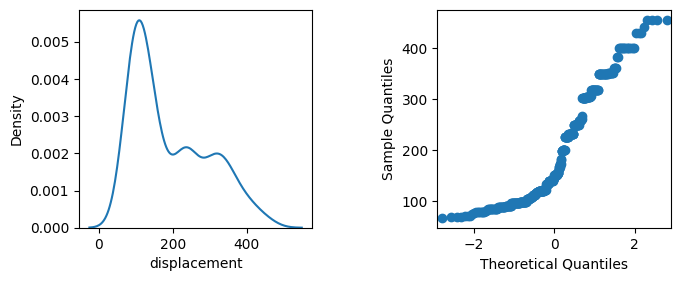

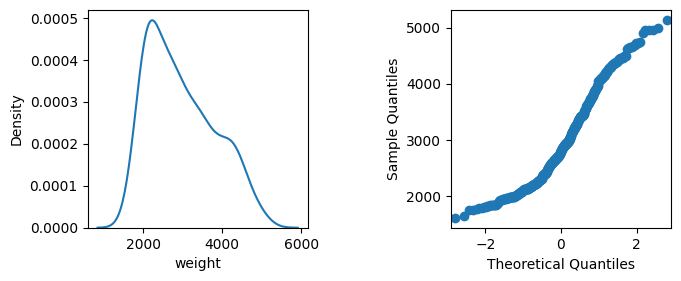

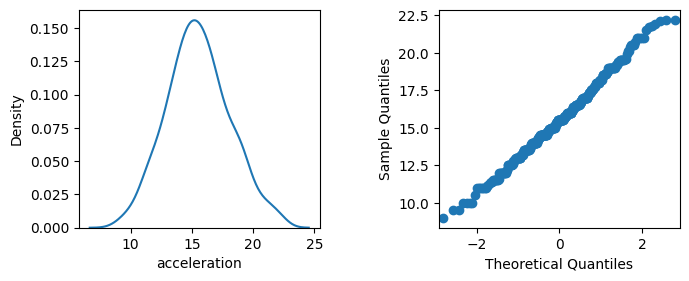

In [174]:
normality_check(x)

In [1]:
def check_multicolinearity(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
    vif_data = pd.DataFrame()
    vif_data['feature'] = x.columns
    vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
    return vif_data

In [176]:
check_multicolinearity(x)

,feature,VIF
0,displacement,44.022044
1,weight,102.429432
2,acceleration,20.165900


In [177]:
check_multicolinearity(x.drop(columns = 'weight'))

,feature,VIF
0,displacement,3.200364
1,acceleration,3.200364


In [178]:
check_multicolinearity(x.drop(columns = 'displacement'))

,feature,VIF
0,weight,7.446531
1,acceleration,7.446531


In [179]:
check_multicolinearity(x.drop(columns = 'acceleration'))

,feature,VIF
0,displacement,16.255734
1,weight,16.255734


In [205]:
# Model 1 - constant + weight + displacement + acceleration
x1 = sm.add_constant(x)
model_1 = sm.OLS(y,x1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     kilometer_per_liter   R-squared:                       0.705
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                     308.5
Date:                 Tue, 15 Nov 2022   Prob (F-statistic):          3.04e-102
Time:                         00:05:15   Log-Likelihood:                -779.60
No. Observations:                  391   AIC:                             1567.
Df Residuals:                      387   BIC:                             1583.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.1581      0.815     22.274      0.000      16.555      19.761
displacement    -0.0054      0.003     -1.983      0.048      -0.011   -4.71e-05
weight          -0.0026      0.000     -8.274      0.000      -0.003      -0.002
acceleration     0.0328      0.043      0.759      0.448      -0.052       0.118
==============================================================================
Omnibus:                       35.736   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.160
Skew:                           0.672   Prob(JB):                     3.49e-11
Kurtosis:                       4.073   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

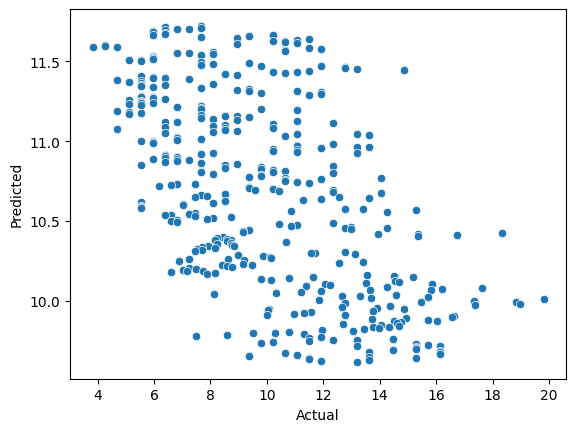

In [206]:
for i,j,k in zip(x['displacement'],x['weight'],x['acceleration']):
    y_hat = pd.DataFrame(columns = ['Value'])
    y_hat['Value'] = [18.1581 + -0.0054*i + -0.0026*j + 0.0328*k for i in range(len(x['acceleration']))]

sns.scatterplot(x = y, y = y_hat.iloc[:,0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [207]:
#Model 2 - constant + displacement + acceleration
x1 = sm.add_constant(x.drop(columns = 'weight'))
model_2 = sm.OLS(y,x1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     kilometer_per_liter   R-squared:                       0.653
Model:                             OLS   Adj. R-squared:                  0.651
Method:                  Least Squares   F-statistic:                     365.1
Date:                 Tue, 15 Nov 2022   Prob (F-statistic):           6.59e-90
Time:                         00:05:22   Log-Likelihood:                -811.44
No. Observations:                  391   AIC:                             1629.
Df Residuals:                      388   BIC:                             1641.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.0959      0.841     19.140      0.000      14.442      17.749
displacement    -0.0265      0.001    -23.637      0.000      -0.029      -0.024
acceleration    -0.0654      0.045     -1.450      0.148      -0.154       0.023
==============================================================================
Omnibus:                       42.131   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.815
Skew:                           0.686   Prob(JB):                     1.88e-15
Kurtosis:                       4.510   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

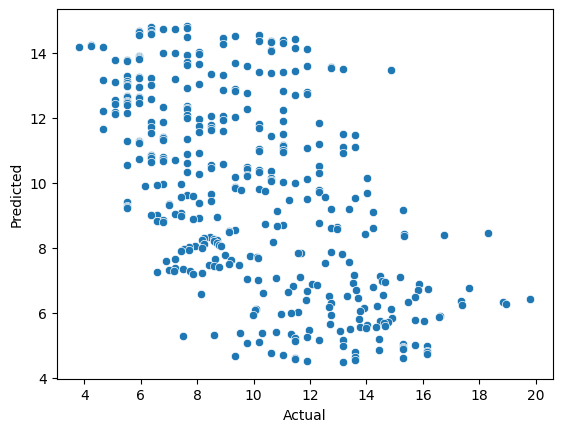

In [208]:
for i,j in zip(x['displacement'],x['acceleration']):
    y_hat = pd.DataFrame(columns = ['Value'])
    y_hat['Value'] = [16.0959 + -0.0265*i + -0.0654*j for i in range(len(x['acceleration']))]

sns.scatterplot(x = y, y = y_hat.iloc[:,0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [209]:
# Model 3 - displacement + acceleration
x1 = x.drop(columns = 'weight')
model_3 = sm.OLS(y,x1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     kilometer_per_liter   R-squared (uncentered):                   0.934
Model:                             OLS   Adj. R-squared (uncentered):              0.934
Method:                  Least Squares   F-statistic:                              2775.
Date:                 Tue, 15 Nov 2022   Prob (F-statistic):                   5.76e-231
Time:                         00:05:31   Log-Likelihood:                         -941.42
No. Observations:                  391   AIC:                                      1887.
Df Residuals:                      389   BIC:                                      1895.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement    -0.0115      0.001    -10.302      0.000      -0.014      -0.009
acceleration     0.7709      0.015     49.785      0.000       0.740       0.801
==============================================================================
Omnibus:                        2.379   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.119
Skew:                           0.150   Prob(JB):                        0.347
Kurtosis:                       3.200   Cond. No.                         24.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

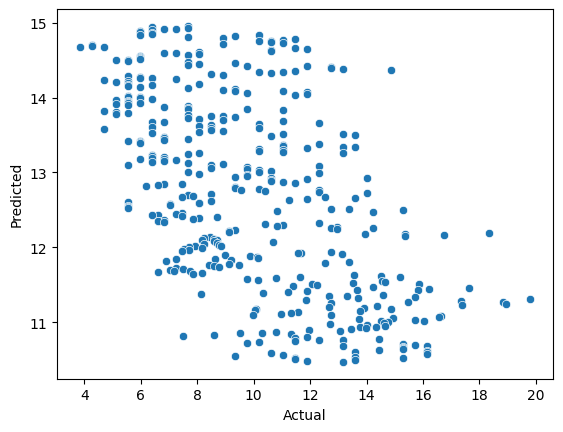

In [210]:
for i,j in zip(x['displacement'],x['acceleration']):
    y_hat = pd.DataFrame(columns = ['Value'])
    y_hat['Value'] = [-0.0115*i + 0.7709*j for i in range(len(x['acceleration']))]

sns.scatterplot(x = y, y = y_hat.iloc[:,0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()